In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
genres = pd.read_pickle('movie_to_genres.p')
movies = pd.read_pickle('movies.p')
genres.head()
# movies.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [34]:
pop = movies.sort_values(by='popularity', ascending=False).iloc[:10, :]
pg = pop.merge(genres, how='left', left_on='id', right_on='movie_id', suffixes=('_pop', '_genre'))
pg.head()

,id,title,popularity,release_date,movie_id,genre
0,211672,Minions,875.581305,2015-06-17,211672,Comedy
1,211672,Minions,875.581305,2015-06-17,211672,Adventure
2,211672,Minions,875.581305,2015-06-17,211672,Animation
3,211672,Minions,875.581305,2015-06-17,211672,Family
4,157336,Interstellar,724.247784,2014-11-05,157336,Drama


In [50]:
# pd.concat([inv_jan, inv_feb, inv_mar], ingore_index = False, keys=['jan', 'feb', 'mar'], sort=True) 
# #concatenates invoices for 3 months, ignores index value and divides rows by month, sorts in alphabetical order

#pd.concant([inv_jan, inv_mar], join='inner') #only common columns will remain
movies.merge(genres, how='left', left_on='id', right_on='movie_id', validate='one_to_many')  #it will throw an error if not one_to_many

,id,title,popularity,release_date,movie_id,genre
0,257,Oliver Twist,20.415572,2005-09-23,257.0,Crime
1,257,Oliver Twist,20.415572,2005-09-23,257.0,Drama
2,257,Oliver Twist,20.415572,2005-09-23,257.0,Family
3,14290,Better Luck Tomorrow,3.877036,2002-01-12,14290.0,Crime
4,14290,Better Luck Tomorrow,3.877036,2002-01-12,14290.0,Drama
...,...,...,...,...,...,...
12183,13807,Exiled,8.486390,2006-09-06,13807.0,Crime
12184,13807,Exiled,8.486390,2006-09-06,13807.0,Action
12185,73873,Albert Nobbs,7.802245,2011-12-21,73873.0,Drama
12186,11622,Blast from the Past,8.737058,1999-02-12,11622.0,Comedy


In [76]:
b22 = pd.read_csv('business-operations-survey-2022-business-finance-utf8.csv')
b23 = pd.read_csv('business-operations-survey-2023-business-operations.csv-utf8.csv', encoding='latin1')
b23.head()
# print(b22.columns, '\n', b23.columns)
b2223 = pd.concat([b22, b23], verify_integrity=False, ignore_index=True) #throws an error that there are overlapping values if set to True
b2223.head()

,description,industry,level,size,line_code,value,status,Unit,Footnotes
0,Type of outstanding debt: bank overdrafts,total,0,619 employees,D0201,13215.0,NaN,NaN,NaN
1,Type of outstanding debt: bank overdrafts,total,0,2049 employees,D0201,3405.0,NaN,NaN,NaN
2,Type of outstanding debt: bank overdrafts,total,0,5099 employees,D0201,978.0,NaN,NaN,NaN
3,Type of outstanding debt: bank overdrafts,total,0,100+ employees,D0201,687.0,NaN,NaN,NaN
4,Type of outstanding debt: bank overdrafts,"Agriculture, forestry, & fishing",1,total,D0201,1974.0,NaN,NaN,NaN


              GDP   Returns
GDP      1.000000  0.040669
Returns  0.040669  1.000000


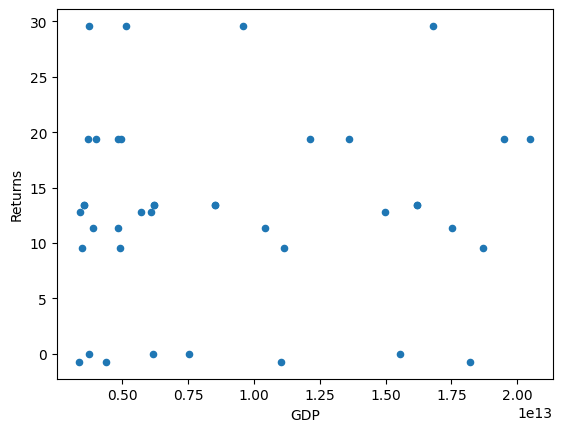

In [118]:
gdp = pd.read_csv('WorldBank_GDP.csv')
pop = pd.read_csv('WorldBank_POP.csv')
sp500 = pd.read_csv('S&P500.csv')
wb_sp = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', how='left',  fill_method='ffill') #  fill method will ffill with fill data with previous data
wb_returns = wb_sp.loc[:, ['GDP', 'Returns']]
print(wb_returns.corr())
wb_sp.plot(x = 'GDP', y = 'Returns', kind='scatter')
plt.show()

          GDP       Pop
GDP  1.000000 -0.040276
Pop -0.040276  1.000000


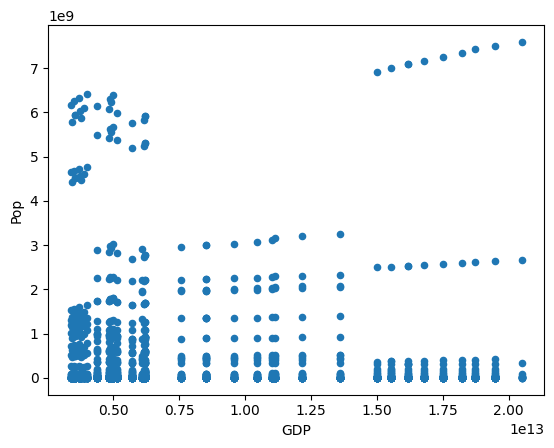

In [142]:
wb_gdp_pop = pd.merge_ordered(gdp, pop, on=['Year', 'Country Name'], fill_method='ffill')
wb_gdp_pop['GDP per Capita'] = wb_gdp_pop['GDP'] / wb_gdp_pop['Pop']
print(wb_gdp_pop[['GDP', 'Pop']].corr())
wb_gdp_pop.plot(x='GDP', y='Pop', kind='scatter')
plt.show()

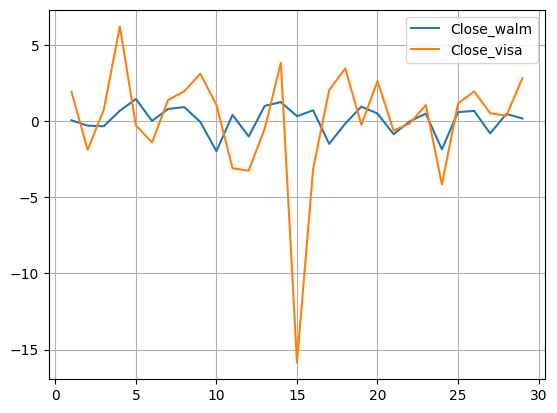

In [ ]:
walm = pd.read_csv('wmt_data.csv')
visa = pd.read_csv('visa_stocks.csv')

walm['Date'] = pd.to_datetime(walm['Date'])
visa['Date'] = pd.to_datetime(visa['Date'])
walm = walm[(walm['Date'].isin(visa['Date'])) & (walm['Date'] > '2024-09')]
visa = visa[visa['Date'] > '2024-09']

walm_visa = pd.merge_asof(walm[['Date', 'Close']], visa[['Date', 'Close']], on='Date', suffixes=('_walm', '_visa'), direction='nearest')
diffs = walm_visa.diff()
diffs.plot(y=['Close_walm', 'Close_visa'], grid=True)
plt.show()

In [210]:
gdp.query('Year == 2011')

,Country Name,Country Code,Indicator Name,Year,GDP
4,China,CHN,GDP (current US$),2011,7.551500e+12
5,Germany,DEU,GDP (current US$),2011,3.757700e+12
6,Japan,JPN,GDP (current US$),2011,6.157460e+12
7,United States,USA,GDP (current US$),2011,1.554260e+13


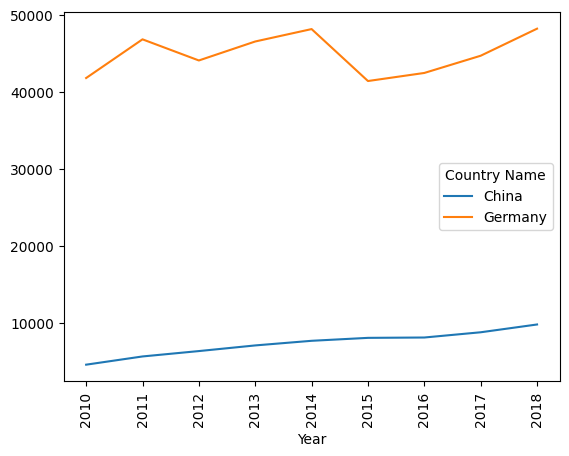

In [226]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['Country Name','Year'], fill_method='ffill')
gdp_pop = gdp_pop[(gdp_pop['Country Name'] == 'China') | (gdp_pop['Country Name'] == 'Germany')]
# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['GDP'] / gdp_pop['Pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'Year', 'Country Name')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('Year >= 1991')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

In [272]:
visa = visa[['Date', 'Open', 'Close', 'Volume']]
visa_melt = visa.melt(id_vars=['Date', 'Volume'], value_vars=['Open', 'Close'], var_name='Position', value_name='Dollars')
visa_melt.head()


,Date,Volume,Position,Dollars
0,2024-09-03,7278300,Open,276.369995
1,2024-09-04,6107500,Open,278.709991
2,2024-09-05,6447400,Open,281.000000
3,2024-09-06,7187700,Open,277.769989
4,2024-09-09,10933900,Open,282.089996


In [273]:
visa.head()

,Date,Open,Close,Volume
4142,2024-09-03,276.369995,278.540009,7278300
4143,2024-09-04,278.709991,280.489990,6107500
4144,2024-09-05,281.000000,278.619995,6447400
4145,2024-09-06,277.769989,279.369995,7187700
4146,2024-09-09,282.089996,285.609985,10933900
